# Lab 9:
> Implement Mini-Batch K-Means algorithm

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets import make_blobs
from IPython.display import display_html

In [12]:
def toy_dataset():
    centers = [[1,1], [-2,1], [1,-2], [1,9]]
    n_clusters = len(centers)
    X, labels_true = make_blobs(n_samples=3000, centers = centers, cluster_std=0.9)
    titles = ['x1', 'x2']
    data = pd.DataFrame(X, columns=titles)
    print("Do you want to view first 10 data elemenst?")
    choice = input()
    if choice=='yes':
        display_html(data)
    return data, X

In [14]:
def K_mini_batch(data):
    batch_size = 45
    mbk = MiniBatchKMeans(init='k-means++', n_clusters=4, batch_size=batch_size, n_init=10, max_no_improvement=10,verbose=0)
    mbk.fit(data)
    mbk_means_clusters_centers = np.sort(mbk.cluster_centers_, axis=0)
    labels = pairwise_distances_argmin(data, mbk_means_clusters_centers)
    print("Learned cluster centroids for three clusters")
    centroids = mbk.cluster_centers_
    display_html(pd.DataFrame(centroids, columns=data.columns))
    return mbk, labels

In [6]:
def cluster_new_data(mbk):
    testData = np.array([
        [-1.6434, 2.4534],
        [3.23423, -1.435],
        [1.345, 10.4390],
        [1.4345, 1.23454],
        [0.2311, -2.46345],
        [0.1675, -3.345],
        [2.345323, 3.452234],
        [-2.234, -1.98823],
        [-1.7453, -1.934534],
        [1.23423, 2.4563]
    ])
    labels = mbk.predict(testData)
    labels = labels.reshape(-1,1)
    cols = ['x1', 'x2']
    cols.append('Assigned Cluster')
    newdata_cluster = pd.DataFrame(np.concatenate((testData, labels), axis=1), columns=cols)
    display_html(newdata_cluster)

In [20]:
def view_cluster(labels, X, mbk):
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0,1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        class_member_mask = labels == k
        xy = X[class_member_mask]
        plt.plot(xy[:, 0], xy[:,1], "o", markerfacecolor=tuple(col),markeredgecolor="k", markersize=6)
    plt.plot(mbk.cluster_centers_[:,0], mbk.cluster_centers_[:,1], "o", markerfacecolor="cyan", markeredgecolor="k", markersize=6,)
    plt.title("mini-batch k means clustering centroids are represented in cyan")

In [8]:
def main():
    data, X = toy_dataset()
    mbk, labels = K_mini_batch(data)
    print("Scatter plot of learned clusters:")
    view_cluster(labels, X, mbk)
    print("Do you want clustering for new data based on learned clusters?")
    choice = input()
    if choice == 'yes':
        cluster_new_data(mbk)
    else:
        quit()

Do you want to view first 10 data elemenst?
yes


,x1,x2
0,-1.735766,0.147243
1,-0.241745,9.434410
2,0.655152,-0.812242
3,1.476150,-0.668294
4,1.000977,-0.432698
...,...,...
2995,2.536327,-3.989633
2996,-0.138523,9.076211
2997,-1.028894,1.851800
2998,-1.534482,0.088231


F:\7thSemLab\DWDM\env\lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


Learned cluster centroids for three clusters


,x1,x2
0,1.042463,1.320891
1,0.994599,8.959332
2,0.934795,-2.028764
3,-1.863033,1.030765


Scatter plot of learned clusters:
Do you want clustering for new data based on learned clusters?
yes


F:\7thSemLab\DWDM\env\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(


,x1,x2,Assigned Cluster
0,-1.643400,2.453400,3.0
1,3.234230,-1.435000,2.0
2,1.345000,10.439000,1.0
3,1.434500,1.234540,0.0
4,0.231100,-2.463450,2.0
5,0.167500,-3.345000,2.0
6,2.345323,3.452234,0.0
7,-2.234000,-1.988230,3.0
8,-1.745300,-1.934534,2.0
9,1.234230,2.456300,0.0


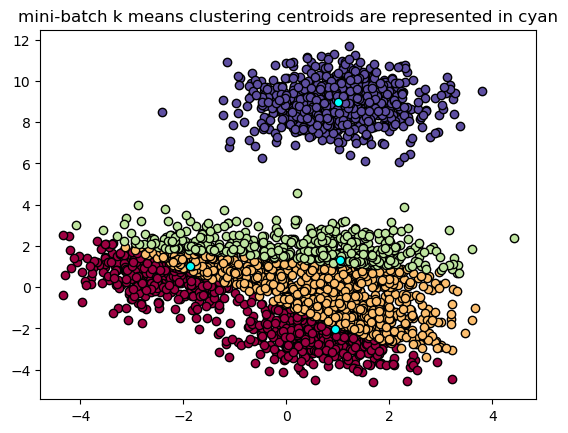

In [21]:
main()